In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [24]:
stock_df = pd.read_csv("../data/stock_price.csv")

## Understanding and Cleaning Data

In [25]:
stock_df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [26]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


In [27]:
stock_df.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [28]:
stock_df.duplicated().sum()

np.int64(0)

- There are few null values in comparision we can remove those
- Date is object. Need to convert it to datetime
- There are no duplicates

In [29]:
stock_df.dropna(inplace=True)

In [30]:
stock_df['date'] = pd.to_datetime(stock_df['date'])

In [31]:
aapl_stock = stock_df[stock_df['symbol'] == 'AAPL']

In [32]:
aapl_stock.set_index('date', inplace=True)

In [33]:
aapl_stock.head()

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957
2014-01-03,AAPL,78.9799,79.0999,77.2042,77.2828,98303870
2014-01-06,AAPL,76.7785,78.1142,76.2285,77.7042,103359151
2014-01-07,AAPL,77.7599,77.9942,76.8464,77.1481,79432766
2014-01-08,AAPL,76.9728,77.9371,76.9556,77.6371,64686685


In [34]:
aapl_stock.shape

(1007, 6)

In [35]:
for val in aapl_stock.columns:
    print('Col',val,'has',aapl_stock[val].nunique(), 'unique values')

Col symbol has 1 unique values
Col open has 946 unique values
Col high has 946 unique values
Col low has 945 unique values
Col close has 935 unique values
Col volume has 1007 unique values


So we basically have data from 2014 - 2017 

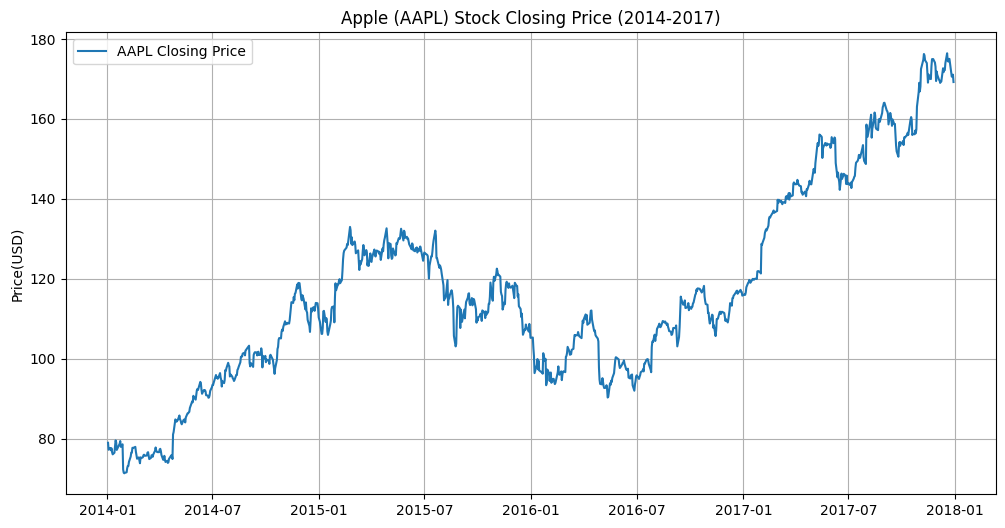

In [36]:
plt.figure(figsize=(12,6))
plt.ylabel("Price(USD)")
plt.title('Apple (AAPL) Stock Closing Price (2014-2017)')
plt.plot(aapl_stock['close'], label='AAPL Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [37]:
aapl_stock = aapl_stock.copy()

aapl_stock['ma50'] = aapl_stock['close'].rolling(50).mean()
aapl_stock['ma200'] = aapl_stock['close'].rolling(200).mean()

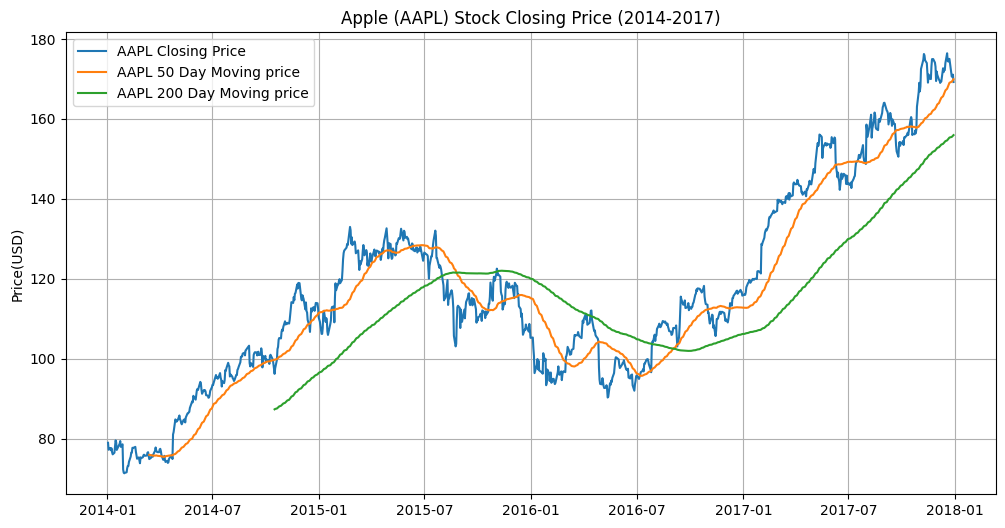

In [38]:
plt.figure(figsize=(12,6))
plt.ylabel("Price(USD)")
plt.title('Apple (AAPL) Stock Closing Price (2014-2017)')
plt.plot(aapl_stock['close'], label='AAPL Closing Price')
plt.plot(aapl_stock['ma50'], label='AAPL 50 Day Moving price')
plt.plot(aapl_stock['ma200'], label='AAPL 200 Day Moving price')
plt.legend()
plt.grid(True)
plt.show()

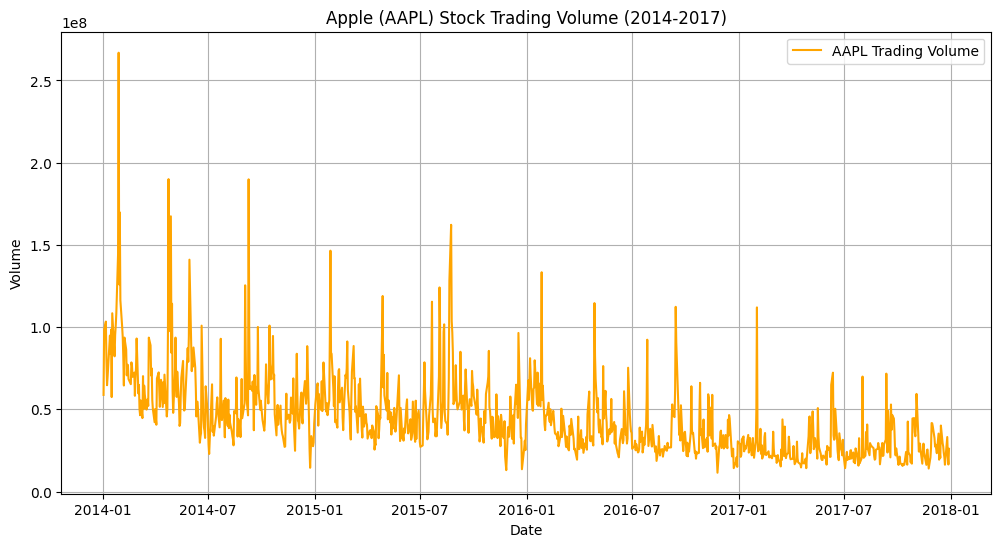

In [39]:
plt.figure(figsize=(12, 6))
plt.plot(aapl_stock['volume'], label='AAPL Trading Volume', color='orange')
plt.title('Apple (AAPL) Stock Trading Volume (2014-2017)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.legend()
plt.grid(True)

In [40]:
aapl_stock.drop(columns=['symbol'], inplace=True)

In [41]:
aapl_stock.head()

,open,high,low,close,volume,ma50,ma200
date,,,,,,,
2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957,NaN,NaN
2014-01-03,78.9799,79.0999,77.2042,77.2828,98303870,NaN,NaN
2014-01-06,76.7785,78.1142,76.2285,77.7042,103359151,NaN,NaN
2014-01-07,77.7599,77.9942,76.8464,77.1481,79432766,NaN,NaN
2014-01-08,76.9728,77.9371,76.9556,77.6371,64686685,NaN,NaN


In [42]:
aapl_stock['close_next'] = aapl_stock['close'].shift(-1)

In [43]:
aapl_stock.head()

,open,high,low,close,volume,ma50,ma200,close_next
date,,,,,,,,
2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957,NaN,NaN,77.2828
2014-01-03,78.9799,79.0999,77.2042,77.2828,98303870,NaN,NaN,77.7042
2014-01-06,76.7785,78.1142,76.2285,77.7042,103359151,NaN,NaN,77.1481
2014-01-07,77.7599,77.9942,76.8464,77.1481,79432766,NaN,NaN,77.6371
2014-01-08,76.9728,77.9371,76.9556,77.6371,64686685,NaN,NaN,76.6455


In [44]:
aapl_stock.dropna(inplace=True)

In [45]:
X = aapl_stock[['open', 'high', 'low', 'volume', 'ma50', 'ma200']]
y = aapl_stock['close_next']

train = aapl_stock[aapl_stock.index < '2017-01-01']
test  = aapl_stock[aapl_stock.index >= '2017-01-01']

X_train = train[['open', 'high', 'low', 'volume', 'ma50', 'ma200']]
y_train = train['close_next']

X_test  = test[['open', 'high', 'low', 'volume', 'ma50', 'ma200']]
y_test  = test['close_next']

In [46]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

## Linear Regression

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

model = LinearRegression()
model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MAE:", mae, "\nRMSE:", rmse, "\nR2 Score:", r2)

MAE: 1.5822893957643565 
RMSE: 2.1728560949595037 
R2 Score: 0.9774396171210272


## KNN

In [48]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=8)
knn.fit(X_train_scaled,y_train)

y_pred_knn = knn.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_knn)
mse = mean_squared_error(y_test, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_knn)

print("MAE:", mae, "\nRMSE:", rmse, "\nR2 Score:", r2)

MAE: 21.8924675 
RMSE: 25.211321046462686 
R2 Score: -2.03721644301324


What Knn try to do is predict by averaging the knn features. But as our dataset is timeseries + the stock are non linear and dynamic. Knn struggles

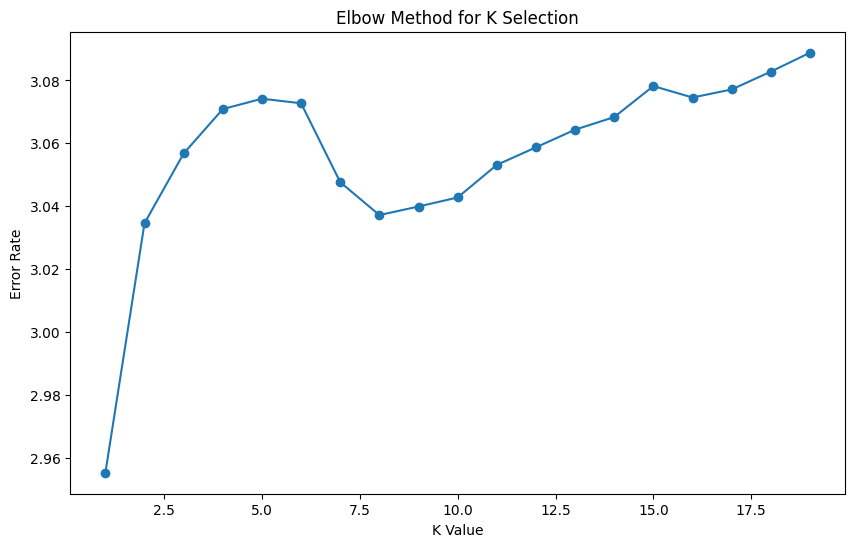

In [49]:
k_range = range(1,20)
error_rates = []

for val in k_range:
    knn = KNeighborsRegressor(n_neighbors=val)
    knn.fit(X_train_scaled,y_train)
    y_pred_knn = knn.predict(X_test_scaled)
    error_rates.append(1 - r2_score(y_test, y_pred_knn))

plt.figure(figsize=(10,6))
plt.plot(k_range, error_rates, marker='o')
plt.xlabel("K Value")
plt.ylabel("Error Rate")
plt.title("Elbow Method for K Selection")
plt.show()

## Decision Tree

In [50]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(
    max_depth=5,
    min_samples_split=20,
    min_samples_leaf=10,
    random_state=42
)

tree.fit(X_train_scaled,y_train)

y_pred_tree = tree.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_tree)
mse = mean_squared_error(y_test, y_pred_tree)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_tree)

print("MAE:", mae, "\nRMSE:", rmse, "\nR2 Score:", r2)

MAE: 23.829798826183104 
RMSE: 27.41324608344851 
R2 Score: -2.5909178191400497


So the DT too doesnt work that well.

## SVM

In [51]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf', C=1, gamma=0.01, epsilon=0.01)
svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_svr)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_svr))
r2 = r2_score(y_test, y_pred_svr)

print("SVR Results:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

SVR Results:
MAE: 20.22755285130565
RMSE: 24.827747522152084
R2 Score: -1.9455010193128666


KNN, DT, SVR are all struggling because they cannot capture the simple linear / feature relationships efficiently.

In [52]:
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1,1)).ravel()
y_test_scaled  = scaler_y.transform(y_test.values.reshape(-1,1)).ravel()

In [53]:
svr_model = SVR(kernel='rbf', C=1, gamma=0.01, epsilon=0.01)
svr_model.fit(X_train_scaled, y_train_scaled)

y_pred_scaled = svr_model.predict(X_test_scaled)

y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1,1)).ravel()

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("SVR Results after scaling y:")
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

SVR Results after scaling y:
MAE: 18.04327372288172
RMSE: 22.7368759523812
R2 Score: -1.4702796544055947


In [54]:
from sklearn.model_selection import GridSearchCV

params = {
    'C': [1, 10, 100, 1000],
    'gamma': [0.01, 0.1, 1],
    'epsilon': [0.01, 0.1, 0.5]
}

grid = GridSearchCV(SVR(kernel='rbf'), param_grid=params, scoring='r2', cv=5)
grid.fit(X_train_scaled, y_train_scaled)

print("Best params:", grid.best_params_)

Best params: {'C': 1, 'epsilon': 0.01, 'gamma': 0.01}


we tried scaling y but the thing is open,high,low are highly correlated to close so the algorithms struggle

## Random Forest

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = model.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred_rf)
mse = mean_squared_error(y_test, y_pred_rf)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_rf)

print("MAE:", mae, "\nRMSE:", rmse, "\nR2 Score:", r2)

MAE: 1.5822893957643565 
RMSE: 2.1728560949595037 
R2 Score: 0.9774396171210272


high and low are very close to 'close', so the model obviously use that relationship to learn. Explainging the strong r2 score

## Testing Prediction

In [56]:
def predict_next_close_rf(open_val, high_val, low_val, volume_val, ma50_val, ma200_val):

    input_features = pd.DataFrame(
        [[open_val, high_val, low_val, volume_val, ma50_val, ma200_val]],
        columns=['open','high','low','volume','ma50','ma200'])
    input_scaled = scaler.transform(input_features)
    predicted_close_next = rf_model.predict(input_scaled)
    return predicted_close_next[0]


In [57]:
aapl_stock.head(6)

,open,high,low,close,volume,ma50,ma200,close_next
date,,,,,,,,
2014-10-16,95.550,97.720,95.41,96.26,72154523,99.77738,87.390483,97.67
2014-10-17,97.500,99.000,96.81,97.67,68179688,99.84118,87.483741,99.76
2014-10-20,98.315,99.960,98.22,99.76,77517279,99.94158,87.596127,102.47
2014-10-21,103.020,103.020,101.27,102.47,94623904,100.07118,87.719956,102.99
2014-10-22,102.840,104.110,102.60,102.99,68263146,100.21158,87.849165,104.83
2014-10-23,104.080,105.051,103.63,104.83,71074674,100.36338,87.985130,105.22


In [58]:
pred_next = predict_next_close_rf(
    open_val=102.840,
    high_val=104.110,
    low_val=102.60,
    volume_val=68263146,
    ma50_val=100.21158,
    ma200_val=87.849165
)

print(f"Predicted Next Day Closing Price: {pred_next:.4f}")

Predicted Next Day Closing Price: 104.5622


In [59]:
import pickle

with open('stock_pickle.pkl','wb') as f:
    pickle.dump(
        (X_train_scaled, X_test_scaled, y_train, y_test), f
    )